<a href="https://colab.research.google.com/github/mslater21/SNA-Project/blob/main/bipartite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph creation

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
new_characters = pd.read_csv('marvel_characters.csv')
old_characters = pd.read_csv('marvel_characters_trimmed.csv')
titles = pd.read_csv('marvel_titles.csv')

In [3]:
new_characters.head()

,title,character,character_alias,actor
0,Captain America: The First Avenger,Steve Rogers,Captain America,Chris Evans
1,Captain America: The First Avenger,Peggy Carter,NaN,Hayley Atwell
2,Captain America: The First Avenger,Bucky Barnes,Winter Soldier,Sebastian Stan
3,Captain America: The First Avenger,Colonel Chester Phillips,NaN,Tommy Lee Jones
4,Captain America: The First Avenger,Johann Schmidt,Red Skull,Hugo Weaving


In [4]:
new_G = nx.Graph()
old_G = nx.Graph()

In [5]:
for index, row in titles.iterrows():
  new_G.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])
  old_G.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])

In [6]:
for index, row in new_characters.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  new_G.add_node(char_name, bipartite=1, alias=row['character_alias'], actor=row['actor'])

for index, row in old_characters.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  old_G.add_node(char_name, bipartite=1, alias=row['character_alias'], actor=row['actor'])

In [7]:
for index, row in new_characters.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  new_G.add_edge(row['title'] + '*', char_name)

for index, row in old_characters.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  old_G.add_edge(row['title'] + '*', char_name)

In [8]:
new_character_nodes = {n for n, d in new_G.nodes(data=True) if d['bipartite'] == 1}
new_title_nodes = set(new_G) - new_character_nodes

old_character_nodes = {n for n, d in old_G.nodes(data=True) if d['bipartite'] == 1}
old_title_nodes = set(old_G) - old_character_nodes

In [10]:
nx.is_bipartite(new_G) and nx.is_bipartite(old_G)

True

# Graph Statistics

## Graph Makeup

### Initial Network

In [11]:
print('Total number of nodes:', old_G.number_of_nodes())
print('Total number of edges:', old_G.number_of_edges())

print('Number of character nodes:', len(old_character_nodes))
print('Number of title nodes:', len(old_title_nodes))

Total number of nodes: 1806
Total number of edges: 2137
Number of character nodes: 1746
Number of title nodes: 60


### Refined Network

In [12]:
print('Total number of nodes:', new_G.number_of_nodes())
print('Total number of edges:', new_G.number_of_edges())

print('Number of character nodes:', len(new_character_nodes))
print('Number of title nodes:', len(new_title_nodes))

Total number of nodes: 854
Total number of edges: 1142
Number of character nodes: 794
Number of title nodes: 60


## Density

### Initial Network

In [13]:
print('Density:', nx.bipartite.density(old_G, old_character_nodes))

Density: 0.02039900725467736


### Refined Network

In [14]:
print('Density:', nx.bipartite.density(new_G, new_character_nodes))

Density: 0.023971452560873217


## Degrees

In [15]:
old_title_degrees, old_character_degrees = nx.bipartite.degrees(old_G, old_character_nodes)
new_title_degrees, new_character_degrees = nx.bipartite.degrees(new_G, new_character_nodes)

In [ ]:
filename='single_degree.txt'
outfile = open(filename, 'w')
one_degree_characters = [n for (n, d) in character_degrees if d == 1]
output = []
for index, row in characters.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  if char_name in one_degree_characters:
    output.append(row['title'] + ': ' + char_name + '\n')
outfile.writelines(output)
outfile.close()

### Character Nodes

#### Initial Network

In [16]:
# Average Degree
sum([d for (n,d) in old_character_degrees]) / len(old_character_nodes)

1.2239404352806416

[]

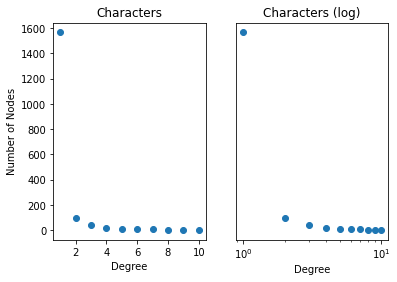

In [18]:
# Node Degree Distribution

fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in old_character_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Characters')

ax[1].scatter(*np.unique([d for (n,d) in old_character_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Characters (log)')
ax[1].set_xscale('log')
ax[1].set_yticks([])

#### Refined Network

In [19]:
# Average Degree
sum([d for (n,d) in new_character_degrees]) / len(new_character_nodes)

1.438287153652393

[]

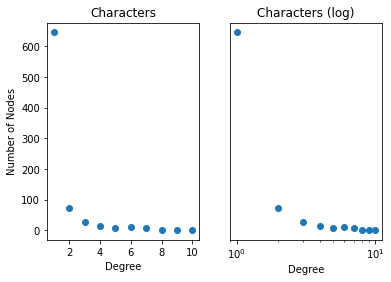

In [20]:
# Node Degree Distribution

fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in new_character_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Characters')

ax[1].scatter(*np.unique([d for (n,d) in new_character_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Characters (log)')
ax[1].set_xscale('log')
ax[1].set_yticks([])

### Title Nodes

#### Initial Network

In [21]:
# Average Degree
sum([d for (n,d) in old_title_degrees]) / len(old_title_nodes)

35.61666666666667

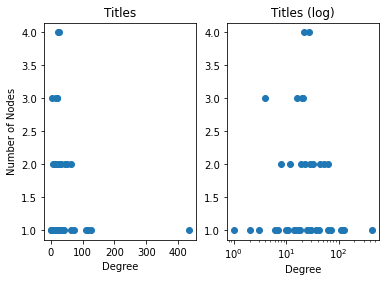

In [22]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in old_title_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Titles')

ax[1].scatter(*np.unique([d for (n,d) in old_title_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Titles (log)')
ax[1].set_xscale('log')

#### Refined Network

In [23]:
# Average Degree
sum([d for (n,d) in new_title_degrees]) / len(new_title_nodes)

19.033333333333335

In [47]:
print(sorted(list(new_title_degrees), key=lambda x:x[1]))

[("Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer*", 1), ('Marvel One-Shot: The Consultant*', 3), ('I Am Groot*', 3), ('Marvel One-Shot: Item 47*', 4), ("Peter's To-Do List*", 4), ('Marvel One-Shot: Agent Carter*', 4), ('WHIH News Front*', 5), ('The Incredible Hulk*', 5), ('Marvel One-Shot: All Hail the King*', 6), ('Doctor Strange*', 8), ('Loki*', 8), ('Black Widow*', 8), ('Secret Invasion*', 9), ('Werewolf by Night*', 11), ('Captain America: The First Avenger*', 11), ('Agents of S.H.I.E.L.D.: Slingshot*', 11), ('Captain Marvel*', 11), ('Spider-Man: Homecoming*', 11), ('Guardians of the Galaxy*', 12), ('Ant-Man and the Wasp*', 12), ('Iron Man*', 13), ('Guardians of the Galaxy Vol. 2*', 13), ('Iron Man 2*', 13), ('Black Panther*', 13), ('Captain America: The Winter Soldier*', 14), ('Ant-Man*', 14), ('Thor: The Dark World*', 14), ('Thor*', 15), ('Moon Knight*', 15), ('The Avengers*', 15), ('Iron Man 3*', 15), ('Thor: Ragnarok*', 16), ('Ms. Marvel*', 16), ('Eternals*

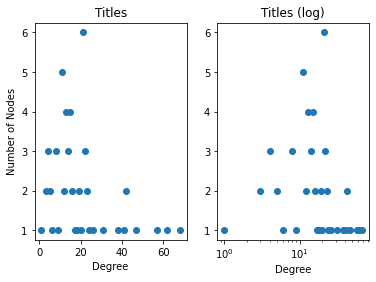

In [43]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in new_title_degrees], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Number of Nodes')
ax[0].set_title('Titles')

ax[1].scatter(*np.unique([d for (n,d) in new_title_degrees], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Titles (log)')
ax[1].set_xscale('log')

# Character Projected Graph


### Initial Network

In [24]:
old_G_char = nx.bipartite.projected_graph(old_G, old_character_nodes)
print(old_G_char)

Graph with 1746 nodes and 137160 edges


In [25]:
# Average Degree
sum([d for (n,d) in nx.degree(old_G_char)]) / old_G_char.number_of_nodes()

157.11340206185568

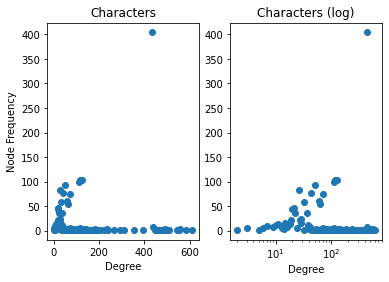

In [41]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in nx.degree(old_G_char)], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Node Frequency')
ax[0].set_title('Characters')

ax[1].scatter(*np.unique([d for (n,d) in nx.degree(old_G_char)], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Characters (log)')
ax[1].set_xscale('log')

In [33]:
# Components
components = nx.connected_components(old_G_char)
for component in components:
  print(len(component), component)

1631 {'Karen Page', 'Emily Deville', 'Quinton the Great', 'Andrew Brandt', 'Janice', 'Agent Jackson', 'Little Maya', 'Dennis Bukowski', 'Luther Banks', 'Zoha', 'Bronaja', 'Yusuf', 'Baron von Strucker', 'Special Agent Sonya Falsworth', 'Mika Prada', 'King Laufey', 'Inn Keeper', 'Etta Lucas', 'Dr. Wilton', 'Reva Connors', 'Skaar', 'Qasim Zaghlul', 'Robert Minoru', 'Officer Zbyszewski', 'Stewart', 'Little Kazi', 'State Senator Asa Henderson', 'Principal Morita', 'Iridia', 'Geoffrey Wilder', 'Tweaky', 'Torre', 'Agent Mike Li', 'Kamar-Taj Teacher', 'Agent Calderon', 'Officer Kennedy', 'Bronwyn', 'Dimitri', 'Nova Prime', 'Griffin Sinclair', 'Carlo Eastman', 'Carlos', 'George Stephanopoulos', 'Agent Anderson', 'Fariha', 'Quentin Beck', 'Joan Rivers', 'Eugene', 'Knox', 'Dr. Abraham Erskine', 'Young Tandy', 'Neda Kazemi', 'Mantis', 'Martina', 'Ovechkin', 'Dr. Leslie Hansen', 'Betty Brant', 'Agent Foster', 'Hope Shlottman', 'Bob Shlottman', 'Elaine Walters', 'Ruby', 'Deputy Murphy', 'Alex Wesley

In [32]:
#Diameter of largest component
components = sorted(nx.connected_components(old_G_char), key=len, reverse=True)
diameter = nx.diameter(old_G_char.subgraph(components[0]))
print('Diameter of largest connected component:', diameter)

Diameter of largest connected component: 7


In [34]:
# Average shortest path length of largest component
components = sorted(nx.connected_components(old_G_char), key=len, reverse=True)
nx.average_shortest_path_length(old_G_char.subgraph(components[0]))

2.6973304796259585

In [ ]:
# What is that crazy outlier?
print(sorted(old_G_char.degree(), key=lambda pair: pair[1], reverse=True))

# Looks like its pretty much all of the Agents of S.H.I.E.L.D characters. The relationships would probably be better if we could split up characters by episode, but we don't really have any way to do that. Could talk about possible ways to deal with that in the report.

[('Nick Fury', 696), ('Peggy Carter', 668), ('Maria Hill', 652), ('Mouse', 624), ('Joe', 624), ('Sergei', 614), ('Thomas', 614), ('Ruby', 614), ('Jerry', 614), ('Marilyn', 612), ('Jackson', 612), ('Rick', 591), ('Dum Dum Dugan', 560), ('Lady Sif', 559), ('Brick', 559), ('Gunner', 554), ('Diego', 553), ('Daniel Sousa', 552), ('Agent Fisher', 552), ('Agent Ford', 552), ('Darryl', 545), ('Tiny', 534), ('Noah', 533), ('Assistant', 530), ('Bruno', 523), ('Dr. List', 519), ('President Ellis', 517), ('Ava', 515), ('Jasper Sitwell', 513), ('Li', 510), ('Ben', 510), ('Jim Morita', 504), ('Agent Anderson', 500), ('Colonel Victor Ramon', 500), ('Soldier #1', 490), ('Durant', 490), ('Joey Gutierrez', 490), ('Captain William Dole', 490), ('Agent Hauer', 490), ('Senator Ellen Nadeer', 490), ('Tat', 490), ('Qajax', 490), ('Jesse Fletcher', 490), ('Alya', 490), ('Agent Prince', 490), ('Serious Man', 490), ('General Fischer', 490), ('William May', 490), ('Vijay Nadeer', 490), ('Robert Gonzales', 490), 

In [50]:
# Clustering Coeffcient 
components = sorted(nx.connected_components(old_G_char), key=len, reverse=True)
nx.average_clustering(old_G_char.subgraph(components[0]))

0.9568874635011437

In [78]:
# Clustering Coeffcient 
nx.transitivity(old_G_char)

0.9691603724717606

### Refined Network

In [29]:
new_G_char = nx.bipartite.projected_graph(new_G, new_character_nodes)
print(new_G_char)

Graph with 794 nodes and 14793 edges


In [31]:
# Average Degree
sum([d for (n,d) in nx.degree(new_G_char)]) / new_G_char.number_of_nodes()

37.26196473551637

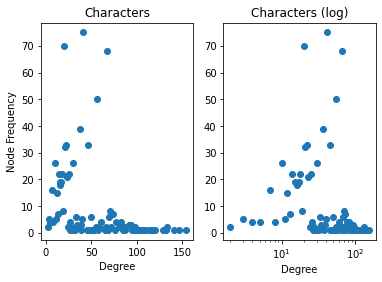

In [42]:
# Node Degree Distribution
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*np.unique([d for (n,d) in nx.degree(new_G_char)], return_counts=True))
ax[0].set_xlabel('Degree')
ax[0].set_ylabel('Node Frequency')
ax[0].set_title('Characters')

ax[1].scatter(*np.unique([d for (n,d) in nx.degree(new_G_char)], return_counts=True))
ax[1].set_xlabel('Degree')
ax[1].set_title('Characters (log)')
ax[1].set_xscale('log')

In [36]:
# Components
components = nx.connected_components(new_G_char)
for component in components:
  print(len(component), component)

673 {'Karen Page', 'Gideon Malick', 'Tommy Maximoff', 'Pedro The Bartender', 'Andrew Brandt', 'Janice', 'Saracen', 'Tibor', 'Dennis Bukowski', 'Ebony Maw', 'Heinz Kruger', 'Agent Monti', 'Shuri-AR', 'Bronaja', 'Detective Rafael Scarfe', 'Carol Danvers', 'Madame Gao', 'Nebula', 'Yusuf', 'Zaya Okonjo', 'Hugh Jones', 'Supreme Intelligence', 'Special Agent Sonya Falsworth', 'Secretary Ross-AR', 'King Laufey', 'Carl Lucas', "O'Connor", 'Ringmaster', 'Bobbi Morse', 'Sergei', 'Reva Connors', 'Gamora', 'Enrique', 'Skaar', 'Pam', 'Auran', 'Dr. Karl Malus', 'Wrecker', 'Brandt', 'Surtur-AR', 'Calvin Chadwick', 'Gorr', 'Marci Stahl', 'Bruno', 'Maya Lopez', 'Mr. Delmar', 'Dale', 'Rosalie Carbone', 'D.W. Griffith', 'Ultron-AR', 'Jack Thompson', 'Hope Van Dyne-AR', 'Baron Mordo', 'Kazi', 'Nova Prime', 'Agent Blake', 'Griffin Sinclair', 'Christine Everhart-AR', 'Carlo Eastman', 'Carlos', 'Agent Anderson', 'Oscar Arocho', 'Mary Walker', "Alphonso 'Mack' Mackenzie", 'Quentin Beck', 'Dr. Stephen Strange'

In [38]:
#Diameter of largest component
components = sorted(nx.connected_components(new_G_char), key=len, reverse=True)
diameter = nx.diameter(new_G_char.subgraph(components[0]))
print('Diameter of largest connected component:', diameter)

Diameter of largest connected component: 5


In [40]:
# Average shortest path length of largest component
components = sorted(nx.connected_components(new_G_char), key=len, reverse=True)
nx.average_shortest_path_length(new_G_char.subgraph(components[0]))

3.2898491120073587

In [49]:
# Clustering Coeffcient 
components = sorted(nx.connected_components(new_G_char), key=len, reverse=True)
nx.average_clustering(new_G_char.subgraph(components[0]))

0.9181513550481859

In [77]:
# Clustering Coeffcient 
nx.transitivity(new_G_char)

0.7865580748804692